In [3]:
import numpy as np
import seaborn as sns
import nsfg

In [4]:
df = nsfg.ReadFemPreg()
nsfg.CleanFemPreg(df)

(1    9148
 2    1862
 3     120
 4    1921
 5     190
 6     352
 Name: outcome, dtype: int64,
 <seaborn.axisgrid.FacetGrid at 0x7f1a52a86f40>)

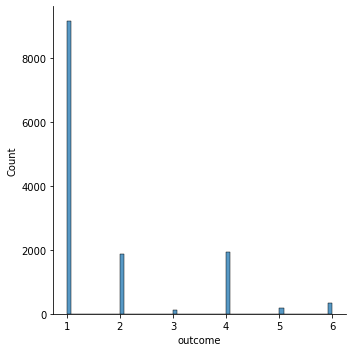

In [12]:
df.outcome.value_counts().sort_index(), sns.displot(df.outcome)

In [11]:
type(df.outcome.value_counts())

pandas.core.series.Series

In [13]:
# Transform to kg
df['birth_wgt_kg'] = df['birthwgt_lb'] * 0.453592

(0        3.628736
 1        3.175144
 2        4.082328
 3        3.175144
 4        2.721552
            ...   
 13588    2.721552
 13589         NaN
 13590         NaN
 13591    3.175144
 13592    3.175144
 Name: birth_wgt_kg, Length: 13593, dtype: float64,
 <seaborn.axisgrid.FacetGrid at 0x7f1a5362fd00>)

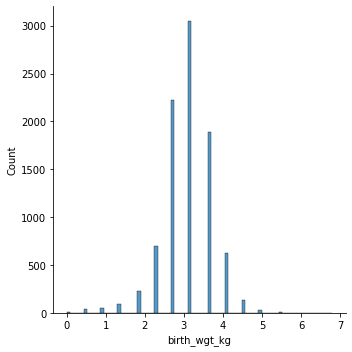

In [19]:
df['birth_wgt_kg'], sns.displot(df['birth_wgt_kg'])

In [18]:
df['birthwgt_lb']

0        8.0
1        7.0
2        9.0
3        7.0
4        6.0
        ... 
13588    6.0
13589    NaN
13590    NaN
13591    7.0
13592    7.0
Name: birthwgt_lb, Length: 13593, dtype: float64